In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

from pathlib import Path

import numpy as np

**There are 8 models that have been trained**. We are excluding the 4.

The rest 4 have been trained on different subsets of the data set.

In [2]:
def get_normalised_rank(row):
    return row["Rank"] / (row["size"] - 1)

In [3]:
def get_result_summaries(folder, lstm_type):  
    results = []
    path = f'{folder}'
    
    for opening in [0, 1, 0.78]:
        dfs = []
        for file in Path(path).glob(f'result_summary_{lstm_type}_seed_*_opening_{opening}.csv'):
            df = pd.read_csv(file, index_col=0)
            df['size'] = [size + 1 for size in df['size']]
            df['Normalised_rank'] = df.apply(lambda row: get_normalised_rank(row), axis = 1)

            dfs.append(df)
        results.append(pd.concat(dfs))
    return results

In [4]:
labels = ['opening 0', 'opening 1', 'opening 0.78']

In [5]:
colors = ['darkorange', 'royalblue']

**Meta tournament results LSTM trained over all data**

In [6]:
meta_results_lstm = get_result_summaries("results_time_3/meta_tournament_results_all/", "sequence")

In [7]:
len(meta_results_lstm), min(meta_results_lstm[0]['seed']),  max(meta_results_lstm[0]['seed'])

(3, 0, 93)

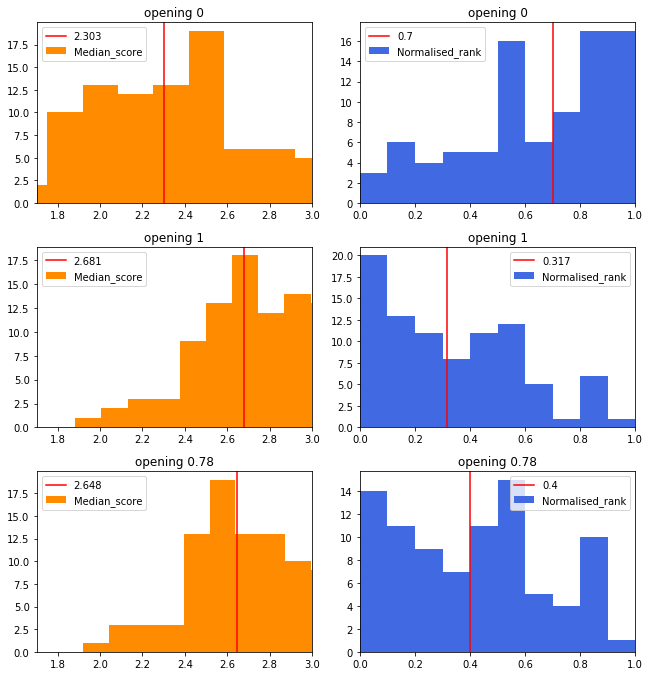

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9.5))

for j, label in enumerate(labels):
    for i, measure in enumerate(['Median_score', 'Normalised_rank']):
    
        values = meta_results_lstm[j][meta_results_lstm[j]['Name'] == 'The LSTM homie'][measure]
        median_values = np.median(values)
        axes[j][i].hist(values, label=f'{measure}', color=colors[i]);
        axes[j][i].axvline(median_values, color='red', label=f'{round(median_values, 3)}')
        axes[j][i].set_title(f'{label}')
        axes[j][i].legend()
        if i == 0:
            axes[j][i].set_xlim(1.7, 3)
        if i == 1:
            axes[j][i].set_xlim(0, 1)
fig.tight_layout()

In [9]:
meta_results_lstm_class = get_result_summaries("results_time_3/meta_tournament_results_all/", "classification")

In [10]:
len(meta_results_lstm_class), min(meta_results_lstm_class[0]['seed']),  max(meta_results_lstm_class[0]['seed'])

(3, 0, 79)

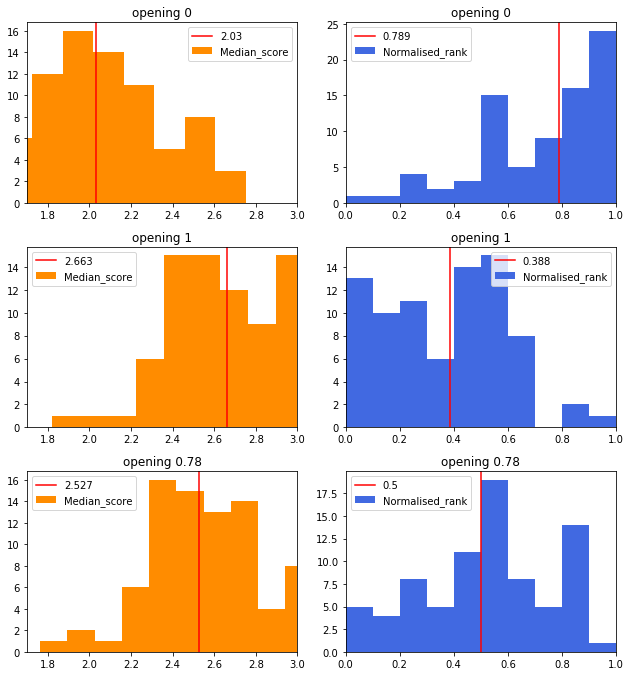

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9.5))

for j, label in enumerate(labels):
    for i, measure in enumerate(['Median_score', 'Normalised_rank']):
    
        values = meta_results_lstm_class[j][meta_results_lstm_class[j]['Name'] == 'The LSTM homie'][measure]
        median_values = np.median(values)
        axes[j][i].hist(values, label=f'{measure}', color=colors[i]);
        axes[j][i].axvline(median_values, color='red', label=f'{round(median_values, 3)}')
        axes[j][i].set_title(f'{label}')
        axes[j][i].legend()
        if i == 0:
            axes[j][i].set_xlim(1.7, 3)
        if i == 1:
            axes[j][i].set_xlim(0, 1)
fig.tight_layout()

**Twenty across**

In [14]:
meta_results_lstm_twenty = get_result_summaries("results_time_3/meta_tournament_results_twenty/", "sequence")

In [16]:
len(meta_results_lstm_twenty), min(meta_results_lstm_twenty[0]['seed']), max(meta_results_lstm_twenty[0]['seed'])

(3, 0, 93)

In [17]:
len(meta_results_lstm_twenty[0]['seed'].unique())

79

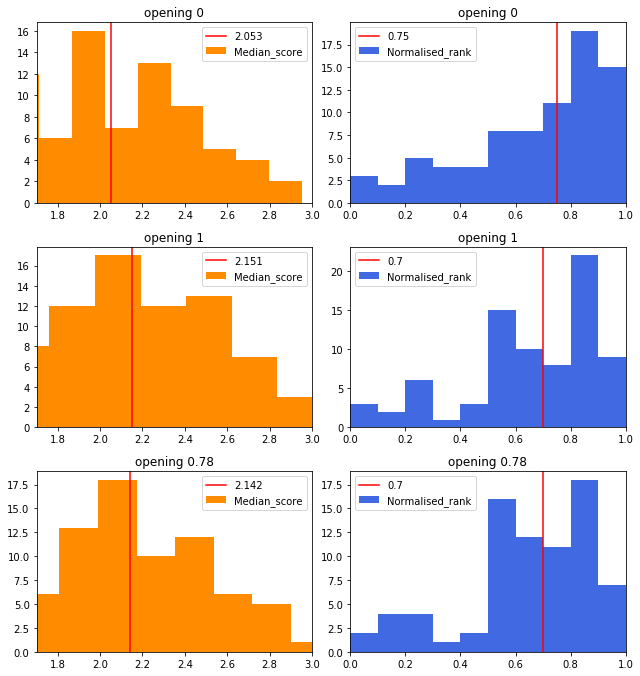

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9.5))

for j, label in enumerate(labels):
    for i, measure in enumerate(['Median_score', 'Normalised_rank']):
    
        values = meta_results_lstm_twenty[j][meta_results_lstm_twenty[j]['Name'] == 'The LSTM homie'][measure]
        median_values = np.median(values)
        axes[j][i].hist(values, label=f'{measure}', color=colors[i]);
        axes[j][i].axvline(median_values, color='red', label=f'{round(median_values, 3)}')
        axes[j][i].set_title(f'{label}')
        axes[j][i].legend()
        if i == 0:
            axes[j][i].set_xlim(1.7, 3)
        if i == 1:
            axes[j][i].set_xlim(0, 1)
fig.tight_layout()

In [19]:
meta_results_lstm_class_twenty = get_result_summaries("results_time_3/meta_tournament_results_twenty/", "classification")

In [20]:
len(meta_results_lstm_class_twenty), min(meta_results_lstm_class_twenty[0]['seed']),  max(meta_results_lstm_class_twenty[0]['seed'])

(3, 0, 79)

In [21]:
len(meta_results_lstm_class_twenty[0]['seed'].unique())

70

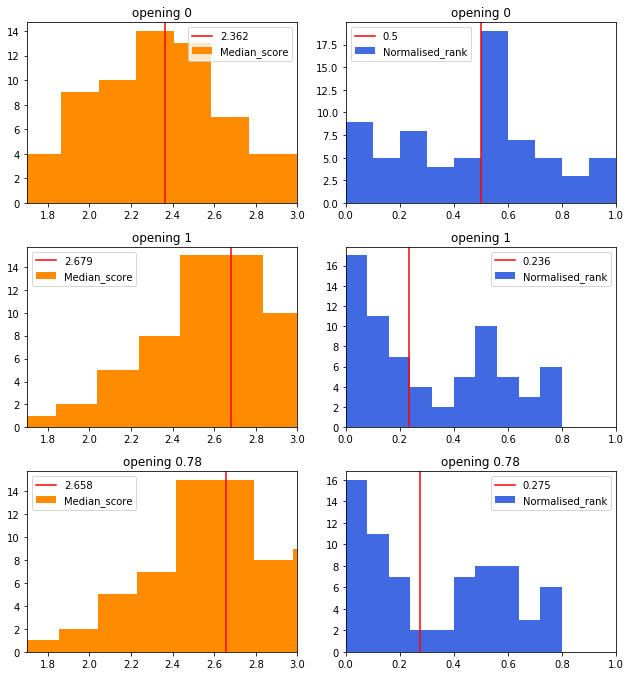

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9.5))

for j, label in enumerate(labels):
    for i, measure in enumerate(['Median_score', 'Normalised_rank']):
    
        values = meta_results_lstm_class_twenty[j][meta_results_lstm_class_twenty[j]['Name'] == 'The LSTM homie'][measure]
        median_values = np.median(values)
        axes[j][i].hist(values, label=f'{measure}', color=colors[i]);
        axes[j][i].axvline(median_values, color='red', label=f'{round(median_values, 3)}')
        axes[j][i].set_title(f'{label}')
        axes[j][i].legend()
        if i == 0:
            axes[j][i].set_xlim(1.7, 3)
        if i == 1:
            axes[j][i].set_xlim(0, 1)
fig.tight_layout()

**Top twenty**

In [33]:
meta_results_lstm_class_top_twenty = get_result_summaries("results_time_3/meta_tournament_results_top_twenty/",
                                                      "classification")

In [ ]:
len(meta_results_lstm_class_basic), min(meta_results_lstm_class_basic[0]['seed']), max(meta_results_lstm_class_basic[0]['seed'])

**Basic**

In [23]:
meta_results_lstm_class_basic = get_result_summaries("results_time_3/meta_tournament_results_basic/",
                                                      "classification")

In [24]:
len(meta_results_lstm_class_basic), min(meta_results_lstm_class_basic[0]['seed']), max(meta_results_lstm_class_basic[0]['seed'])

(3, 0, 79)

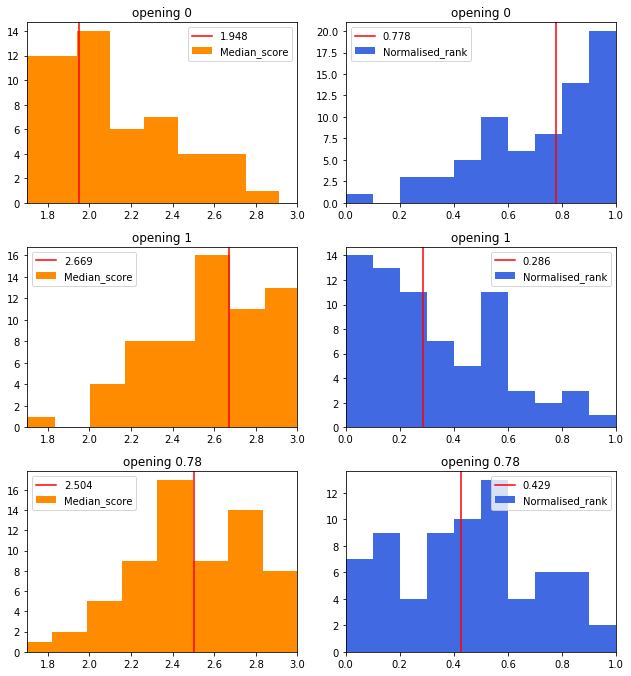

In [25]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9.5))

for j, label in enumerate(labels):
    for i, measure in enumerate(['Median_score', 'Normalised_rank']):
    
        values = meta_results_lstm_class_basic[j][meta_results_lstm_class_basic[j]['Name'] == 'The LSTM homie'][measure]
        median_values = np.median(values)
        axes[j][i].hist(values, label=f'{measure}', color=colors[i]);
        axes[j][i].axvline(median_values, color='red', label=f'{round(median_values, 3)}')
        axes[j][i].set_title(f'{label}')
        axes[j][i].legend()
        if i == 0:
            axes[j][i].set_xlim(1.7, 3)
        if i == 1:
            axes[j][i].set_xlim(0, 1)
fig.tight_layout()

In [29]:
meta_results_lstm_basic = get_result_summaries("results_time_3/meta_tournament_results_basic/",
                                                      "sequence")

In [30]:
len(meta_results_lstm_basic), min(meta_results_lstm_basic[0]['seed']), max(meta_results_lstm_basic[0]['seed'])

(3, 0, 93)

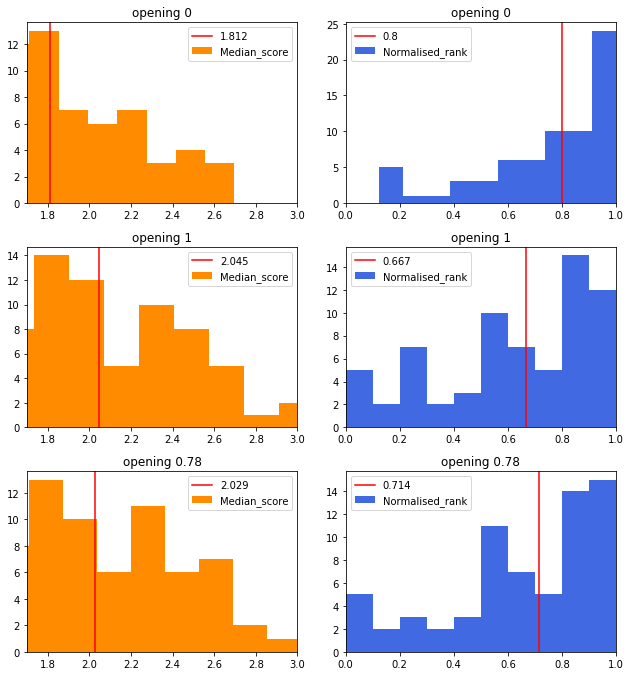

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9.5))

for j, label in enumerate(labels):
    for i, measure in enumerate(['Median_score', 'Normalised_rank']):
    
        values = meta_results_lstm_basic[j][meta_results_lstm_basic[j]['Name'] == 'The LSTM homie'][measure]
        median_values = np.median(values)
        axes[j][i].hist(values, label=f'{measure}', color=colors[i]);
        axes[j][i].axvline(median_values, color='red', label=f'{round(median_values, 3)}')
        axes[j][i].set_title(f'{label}')
        axes[j][i].legend()
        if i == 0:
            axes[j][i].set_xlim(1.7, 3)
        if i == 1:
            axes[j][i].set_xlim(0, 1)
fig.tight_layout()